<h2>This example shows how to create flight track plots using AWOT

In [1]:
# Load the needed packages
import numpy as np
import matplotlib.pyplot as plt

from awot.io.flight import read_netcdf
from awot.graph.common import create_basemap
from awot.graph.flight_level import FlightLevel

%matplotlib inline

Supply user input information

In [2]:
# Set the date
yymmdd="111124"
# Set the project name
Project="DYNAMO"
# Set the path for data file
flname="/Users/guy/data/dynamo/" + yymmdd + "I/20111124I1_DJ_AC.nc"

<li>Set up some characteristics for plotting. 
<li>Use Cylindrical Equidistant Area map projection.
<li>Set the spacing of the barbs and X-axis time step for labels.
<li>Set the start and end times for subsetting.
<li>Add landmarks.

In [3]:
# Set map projection to use
proj = 'cea'

Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 3600

# Should landmarks be plotted? [If yes, then modify the section below
Lmarks=True

# Optional variables that can be included with AWOT
# Start and end times for track in Datetime instance format
start_time = "2011-11-24 01:40:00"
end_time = "2011-11-24 10:50:00"

corners = [72.,-9.,82.,1.]

# IF landmarks are chosen we can make these easuy to display later using AWOT
if Lmarks:
    # Create a list of Landmark data
    LocMark = []
    
    # Add locations as [ StringName, Longitude, Latitude ,XlabelOffset, YlabelOffset]
    LocMark.append(['Diego Garcia', 72.4160, -7.3117, 0.1, -0.6])
    LocMark.append(['R/V Revelle', 80.5010, 0.12167, -0.4, -0.6])
    LocMark.append(['Gan', 73.1017, -0.6308, -0.9, 0.0])
    LocMark.append(['R/V Marai', 80.50, -7.98, -0.1, -0.6])

# Build a few variables for accessing data and plotting the labels
if Lmarks:
    # Build arrays for plotting
    Labels = []
    LabLons = []
    LabLats = []
    XOffset = []
    YOffset = []
    for L1, L2, L3, L4, L5 in LocMark:
        Labels.append(L1)
        LabLons.append(L2)
        LabLats.append(L3)
        XOffset.append(L4)
        YOffset.append(L5)

Read in the flight data

In [4]:
fl = read_netcdf(fname=flname, platform='p-3')

No time variable found, using StarTime to make AWOT time variable


Create figure and set up track plot shaded by altitude

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


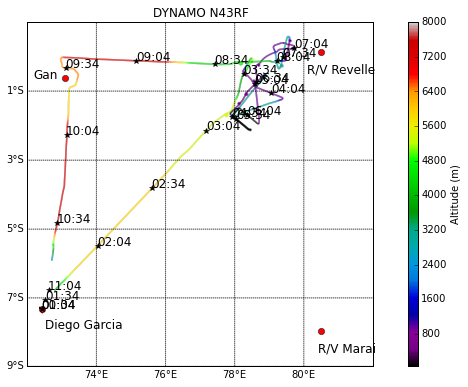

In [5]:
# Creating axes outside seems to screw up basemap
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Set the map for plotting
bm = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1.,ax=ax)

flp = FlightLevel(fl, basemap=bm)

flp.plot_trackmap(
                 start_time=start_time, end_time=end_time,
                 color_by_altitude=True, track_cmap='spectral',
                 min_altitude=50., max_altitude= 8000.,
                 addlegend=True, addtitle=True)

#flp.draw_scale(location='lower_middle')
#flp.draw_barbs(barbspacing=Wbarb_Spacing)

# Write text names on the basemap instance 
for lab, LonTx, LatTx, XOff, YOff in zip(Labels, LabLons, LabLats, XOffset, YOffset):
        flp.plot_point(LonTx, LatTx, label_text=lab, label_offset=(XOff, YOff))

# Add time stamps to the figure
flp.time_stamps()

Now an example of plotting a single variable from the flight data file. We'll also subset it further than the plot above.

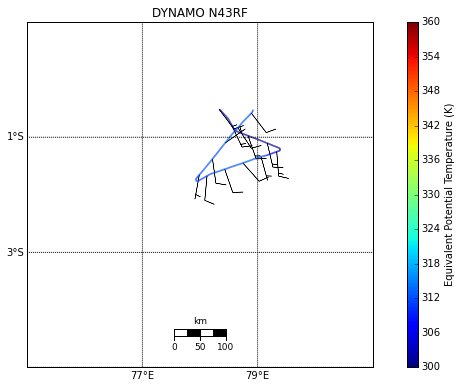

In [6]:
start_time2 = '2011-11-24 03:51:00'
end_time2 = '2011-11-24 04:57:00'
# Domain subset
corners = [75.,-5.,81.,1.]

# Creating axes outside seems to screw up basemap
fig, ax2 = plt.subplots(1, 1, figsize=(7, 7))

# Set the map for plotting
bm2 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1.,ax=ax2)

# Begin a flight plotting instance
flp2 = FlightLevel(fl, basemap=bm2)

# Plot a track using only a variable
flp2.plot_trackmap_variable(
              start_time=start_time2, end_time=end_time2,
              field='potential_temp', cblabel='Equivalent Potential Temperature (K)', 
              track_cmap='jet', min_value=300., max_value= 360.,
              addlegend=False, addtitle=True)

# If we want to add a scale
flp2.draw_scale(location='lower_middle')

# Now let's add wind barbs along the track
flp2.draw_barbs(barbspacing=Wbarb_Spacing, start_time=start_time2, end_time=end_time2)
